In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [35]:
data_labels = pd.read_csv('../data/versions/3/Data_Entry_2017.csv')

print(data_labels.count())

Image Index                    112120
Finding Labels                 112120
Follow-up #                    112120
Patient ID                     112120
Patient Age                    112120
Patient Gender                 112120
View Position                  112120
OriginalImage[Width            112120
Height]                        112120
OriginalImagePixelSpacing[x    112120
y]                             112120
Unnamed: 11                         0
dtype: int64


In [36]:
print(data_labels['Unnamed: 11'].isna().sum())

112120


In [37]:
# We can see that data_labels['Unnamed: 11'] column only contains NaN values.
# We can drop this column as it does not provide any useful information.
data_labels = data_labels.drop(columns=['Unnamed: 11'])

print(data_labels.isna().sum())

Image Index                    0
Finding Labels                 0
Follow-up #                    0
Patient ID                     0
Patient Age                    0
Patient Gender                 0
View Position                  0
OriginalImage[Width            0
Height]                        0
OriginalImagePixelSpacing[x    0
y]                             0
dtype: int64


As we can see, there are no N/A values in this dataset.
Now we have to split 'Finding Labels' column into separate columns for each type of finding value. 

In [38]:

# All possible values of 'Finding Labels' column
finding_vals = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia', 
                'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia', 
                 'No Finding']

for val in finding_vals:
    data_labels[val] = data_labels['Finding Labels'].apply(lambda x: 1 if val in x else 0)

# Drop the original 'Finding Labels' column, it will be no longer needed
data_labels = data_labels.drop(columns=['Finding Labels'])

# Rename 'Image Index' column to 'image_id' for consistency
data_labels = data_labels.rename(columns={'Image Index': 'image_id'})

# Now we look for outliers, especially in 'Patient Age' column
data_labels.describe()




,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Atelectasis,Cardiomegaly,Effusion,...,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,...,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,0.103095,0.024759,0.118775,...,0.056466,0.012763,0.047289,0.041625,0.020540,0.022440,0.015037,0.030191,0.002025,0.538361
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,0.304084,0.155391,0.323524,...,0.230821,0.112251,0.212256,0.199732,0.141841,0.148111,0.121702,0.171113,0.044950,0.498529
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Distribution of Patient Age')

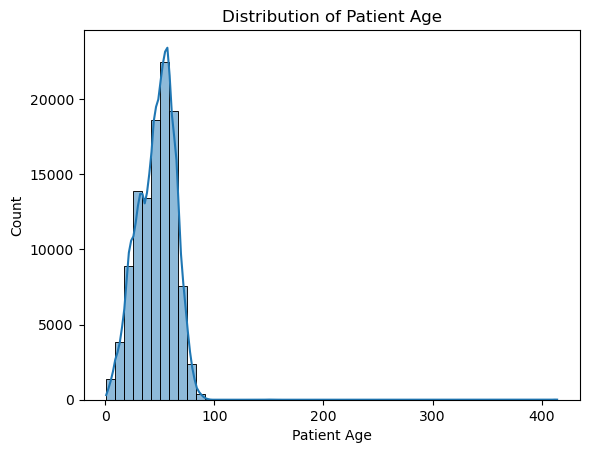

In [39]:
# We can see that the 'Patient Age' column has a maximum value of 414 which definitely seems like an outlier
# Let's visualize the distribution of 'Patient Age' column

sns.histplot(data_labels['Patient Age'], bins=50, kde=True).set_title('Distribution of Patient Age')

In [40]:
# There are 16 cases where 'Patient Age' is greater than 120 - these are likely errors in the dataset itself
print(data_labels[data_labels['Patient Age'] > 120])

# There are some cases where the wrong age is recorded only in one of the rows containing the same Patient ID
# Assuming the photos were taken at the same time or with relatively short breaks, we can use the age from the row where it's lower than 120

valid_ages = (data_labels[data_labels['Patient Age'] <= 120]
              .groupby('Patient ID')['Patient Age']
              .first())

def fix_age(row):
    if row['Patient Age'] > 120:
        valid = valid_ages.get(row['Patient ID'])
        return valid if valid is not None else row['Patient Age']
    else:
        return row['Patient Age']

data_labels['Patient Age'] = data_labels.apply(fix_age, axis=1)


# Now we are left with only 3 cases where 'Patient Age' is greater than 120 instead of 16. We can drop them
data_labels = data_labels[data_labels['Patient Age'] <= 120]

                image_id  Follow-up #  Patient ID  Patient Age Patient Gender  \
20852   00005567_000.png            0        5567          412              M   
46965   00011973_002.png            2       11973          414              M   
48284   00012238_010.png           10       12238          148              M   
55742   00013950_000.png            0       13950          148              M   
58650   00014520_026.png           26       14520          150              M   
62929   00015558_000.png            0       15558          149              M   
74884   00018366_044.png           44       18366          152              F   
78795   00019346_000.png            0       19346          151              F   
84810   00020900_002.png            2       20900          411              M   
85404   00021047_002.png            2       21047          412              M   
86264   00021275_003.png            3       21275          413              F   
91369   00022811_000.png    

In [41]:
print(data_labels[data_labels['Patient Age'] > 120])

Empty DataFrame
Columns: [image_id, Follow-up #, Patient ID, Patient Age, Patient Gender, View Position, OriginalImage[Width, Height], OriginalImagePixelSpacing[x, y], Atelectasis, Cardiomegaly, Effusion, Infiltration, Mass, Nodule, Pneumonia, Pneumothorax, Consolidation, Edema, Emphysema, Fibrosis, Pleural_Thickening, Hernia, No Finding]
Index: []

[0 rows x 25 columns]


Text(0.5, 1.0, 'Distribution of No Finding')

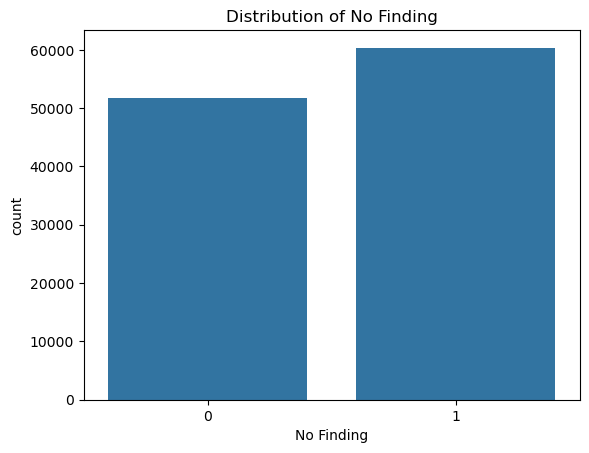

In [42]:
sns.countplot(x = data_labels['No Finding']).set_title('Distribution of No Finding')

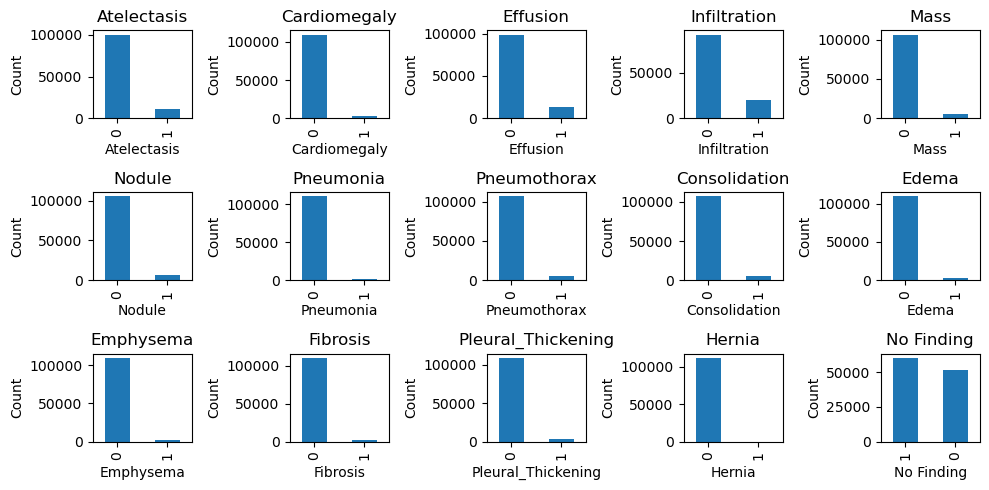

In [43]:
data_labels['Patient ID'].nunique()

# There are 30 805 unique patients in the dataset, we have removed 3 of them and now have 30 802 unique patients - everything is correct.

fig, axes = plt.subplots(3, 5, figsize=(20, 15))
axes = axes.flatten()
for i, val in enumerate(finding_vals):
    data_labels[val].value_counts().plot(kind='bar', ax = axes[i], figsize=(10, 5))
    axes[i].set_title(f'{val}')
    axes[i].set_xlabel(val)
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    axes[j].axis('off')  

plt.tight_layout()
plt.show()


In [44]:
# Columns containing original image data aren't relevant for now, we can create new DataFrame with only the necessary columns for the model

model_data = data_labels.drop(columns=['OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]'])

In [45]:
model_data.head()

,image_id,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,Atelectasis,Cardiomegaly,Effusion,Infiltration,...,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding
0,00000001_000.png,0,1,58,M,PA,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,1,58,M,PA,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,00000001_002.png,2,1,58,M,PA,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,2,81,M,PA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,00000003_000.png,0,3,81,F,PA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


     Image Count  Patient ID
0              1       17500
1              2        4113
2              3        2100
3              4        1330
4              5         938
..           ...         ...
98           143           1
99           157           1
100          158           1
101          173           1
102          184           1

[103 rows x 2 columns]


<Axes: xlabel='Image Count', ylabel='Patient ID'>

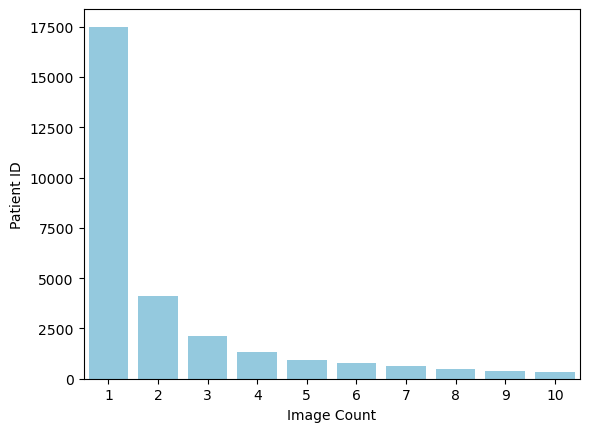

In [46]:
### add plot how many images are there for each patient

patient_counts = model_data['Patient ID'].value_counts()
patient_counts = patient_counts.reset_index()
patient_counts.columns = ['Patient ID', 'Image Count']


patient_counts = patient_counts.sort_values(by='Image Count', ascending=False)

# We can see that there are patients with very high number of images. Therefore it's imoportant to not separate them into different sets.
patient_counts = patient_counts.groupby('Image Count').agg({'Patient ID': 'count'}).reset_index()

top10 = patient_counts.nlargest(10, 'Patient ID')

print(patient_counts)


sns.barplot(top10, x='Image Count', y='Patient ID', color='skyblue')



More than half of our patients have 1 image only, but there are some patients single patients that have many more images - with the highest having 184 images. <br>
Now we must think about how to handle the 'Patient ID' and 'Follow_up #' columns. If we had date/timestamp on a photo we could use it to create a time series model, but we don't have that information and it is not the aim of this project. The way to go is treating each image as a separate sample. We can drop those columns and use 'image_id' as an unique ID for each sample - after checking if it's truly unique. But we will do it AFTER splitting dataset into training, validation and test set - because we want to avoid data leakage. We will do it in the next notebook

In [47]:
model_data['image_id'].is_unique

True

In [48]:
model_data['Patient Gender'].value_counts()
# Now we can chenge 'Patient Gender' column to numerical values, where 'M' is 1 and 'F' is 0
model_data['Patient Gender'] = model_data['Patient Gender'].map({'M': 1, 'F': 0})

In [49]:
model_data['View Position'].value_counts()
# We have only 2 positions of patients during scans - 'AP' (anterior-posterior) and 'PA' (posterior-anterior)
# We can convert this column to numerical values, where 'AP' is 1 and 'PA' is 0, just like with 'Patient Gender' column
model_data['View Position'] = model_data['View Position'].map({'AP': 1, 'PA': 0})

In [50]:
model_data.head()

,image_id,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,Atelectasis,Cardiomegaly,Effusion,Infiltration,...,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding
0,00000001_000.png,0,1,58,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,1,58,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,00000001_002.png,2,1,58,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,2,81,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,00000003_000.png,0,3,81,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Now we can split the data into training, validation and test sets. We will continue in the next notebook, let's save it for now

model_data.to_parquet('../data/model_data.parquet')